<a href="https://colab.research.google.com/github/lelascarnevali/py-Analise_Carteira/blob/main/Drawdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

In [3]:
yf.pdr_override()
tickers = "^BVSP ^GSPC GC=F USDBRL=X"
carteira = yf.download(tickers, interval='1mo', start="2008-01-01")["Close"]

[*********************100%***********************]  4 of 4 completed


In [4]:
carteira.columns = ["OURO", "DOLAR", "IBOV", "S&P500"]
carteira = carteira.dropna()
carteira["OURO_BRL"]=carteira["OURO"]*carteira["DOLAR"]
carteira["S&P500_BRL"]=carteira["S&P500"]*carteira["DOLAR"]

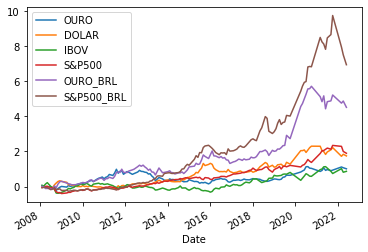

In [5]:
retornos = carteira.pct_change()[1:]
retornos_acc = (1+retornos).cumprod()-1
retornos_acc.plot()

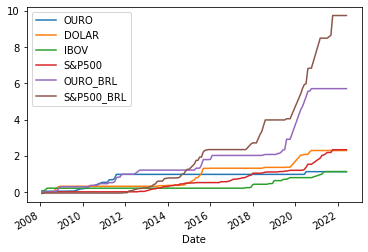

In [6]:
picos_retornos = retornos_acc.cummax()
picos_retornos.plot()

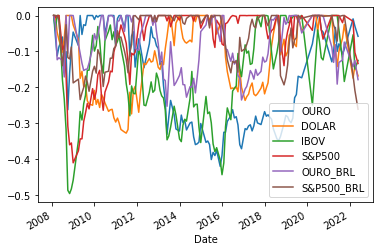

In [7]:
drawdown = ((1+retornos_acc)-(1+picos_retornos))/(1+picos_retornos)
drawdown.plot()

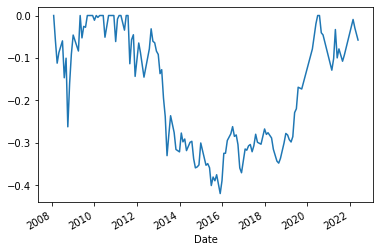

In [8]:
drawdown['OURO'].plot()

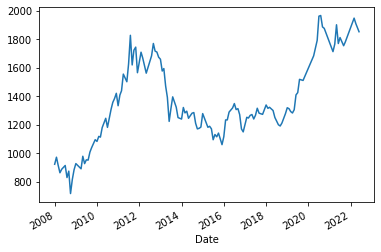

In [9]:
carteira['OURO'].plot()

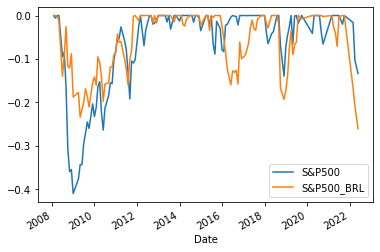

In [10]:
drawdown[['S&P500','S&P500_BRL']].plot()

# Criando uma função de Drawdown

A função receberá como entrada uma série temporal de retornos e retornará uma série temporal como um DataFrame que contém o retorno acumulado, os picos e os drawdown como porcentagem.

In [11]:
def Drawdown(serie_retorno: pd.Series):
  retornos_acc = (1+serie_retorno).cumprod()-1
  picos_retornos = retornos_acc.cummax()
  drawdown = ((1+retornos_acc)-(1+picos_retornos))/(1+picos_retornos)
  return pd.DataFrame({"Retornos_Acc": retornos_acc, 
                         "Picos_Retornos": picos_retornos, 
                         "Drawdown": drawdown})

In [12]:
Drawdown(retornos['IBOV']).head()

,Retornos_Acc,Picos_Retornos,Drawdown
Date,,,
2008-02-01,0.067221,0.067221,0.000000
2008-03-01,0.024845,0.067221,-0.039708
2008-04-01,0.140830,0.140830,0.000000
2008-05-01,0.220256,0.220256,0.000000
2008-07-01,0.000252,0.220256,-0.180293
